In [ ]:
# 导入必要的库
import tensorflow as tf  # TensorFlow深度学习框架
from tensorflow import keras  # Keras高级神经网络API
import numpy as np  # 数值计算库，用于处理数组和矩阵
import matplotlib.pyplot as plt  # 数据可视化库，用于绘制图表和图形

In [ ]:
# 从Keras数据集模块中加载MNIST手写数字数据集
# MNIST是一个包含0-9手写数字图片的经典计算机视觉数据集
mnist = keras.datasets.mnist

# 使用load_data()方法加载MNIST数据集
# 该方法返回两个元组，分别包含训练集和测试集
# train_images: 训练图像数据，形状为(60000, 28, 28)，包含60000张28x28像素的灰度图片
# train_labels: 训练标签数据，形状为(60000,)，包含60000个对应的数字标签(0-9)
# test_images: 测试图像数据，形状为(10000, 28, 28)，包含10000张28x28像素的灰度图片
# test_labels: 测试标签数据，形状为(10000,)，包含10000个对应的数字标签(0-9)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# 打印训练集图像的形状信息
# train_images是一个三维数组，包含所有训练样本的图像数据
# 输出格式为: (样本数量, 图像高度, 图像宽度)
# 对于MNIST数据集，预期输出: (60000, 28, 28)
# 表示有60000张训练图片，每张图片尺寸为28x28像素
print('train_images.shape=', train_images.shape)

# 打印测试集图像的形状信息
# test_images同样是一个三维数组，包含所有测试样本的图像数据
# 对于MNIST数据集，预期输出: (10000, 28, 28)
# 表示有10000张测试图片，每张图片尺寸为28x28像素
print('test_images.shape=', test_images.shape)

# 打印训练集标签的形状信息
# train_labels是一个一维数组，包含所有训练样本对应的数字标签
# 输出格式为: (样本数量,)
# 对于MNIST数据集，预期输出: (60000,)
# 表示有60000个训练标签，每个标签对应一个0-9的数字
print('train_labels.shape=', train_labels.shape)

# 打印测试集标签的形状信息
# test_labels是一个一维数组，包含所有测试样本对应的数字标签
# 对于MNIST数据集，预期输出: (10000,)
# 表示有10000个测试标签，每个标签对应一个0-9的数字
print('test_labels.shape=', test_labels.shape)

train_images.shape= (60000, 28, 28)
test_images.shape= (10000, 28, 28)
train_labels.shape= (60000,)
test_labels.shape= (10000,)


In [ ]:
# 从训练集中提取第6001张图片（索引从0开始，所以索引6000对应第6001张图片）
# num是一个28x28的二维数组，包含该图片的像素值
num = train_images[6000]

# 使用双重循环遍历图片的每一个像素
# 外层循环：遍历图片的每一行（共28行）
for i in range(28):
  # 内层循环：遍历当前行的每一列（共28列）
  for j in range(28):
    # 格式化输出每个像素值：
    # '{:4d}' - 每个数字占用4个字符宽度，右对齐
    # format(num[i][j]) - 将第i行第j列的像素值格式化为整数
    # end='' - 不在输出后换行，使同一行的像素值连续显示
    print('{:4d}'.format(num[i][j]), end='')

  # 当一行（28个像素）输出完成后，换行到下一行
  # 这样就能以28x28的网格形式显示整张图片的像素值
  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 200 255 229   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  50 200 253 251 102   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 236 254 224  98   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   4  21 236 254 217  74   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  70 254 253 252  67   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  11 192 254 253 108   0   0   0   0   0   0   0   0

train_labels[:4]= [5 0 4 1]


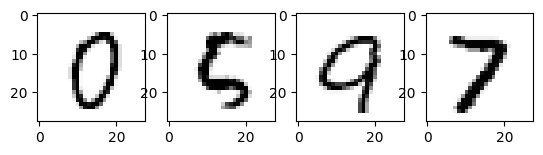

In [ ]:

# 创建一个新的图形窗口，用于显示多个子图
fig = plt.figure()

# 创建第一个子图（1行4列中的第1个位置）
# 参数说明：(行数, 列数, 位置索引)
ax1 = fig.add_subplot(1, 4, 1)

# 创建第二个子图（1行4列中的第2个位置）
ax2 = fig.add_subplot(1, 4, 2)

# 创建第三个子图（1行4列中的第3个位置）
ax3 = fig.add_subplot(1, 4, 3)

# 创建第四个子图（1行4列中的第4个位置）
ax4 = fig.add_subplot(1, 4, 4)

# 在第一个子图中显示训练集的第1001张图片（索引从0开始）
# imshow()函数用于显示图像
# cmap='Greys' 指定使用灰度色图，黑色表示低像素值，白色表示高像素值
ax1.imshow(train_images[1000], cmap='Greys')

# 在第二个子图中显示训练集的第2001张图片
ax2.imshow(train_images[2000], cmap='Greys')

# 在第三个子图中显示训练集的第3001张图片
ax3.imshow(train_images[3000], cmap='Greys')

# 在第四个子图中显示训练集的第4001张图片
ax4.imshow(train_images[4000], cmap='Greys')

# 打印前4个训练样本的标签
# train_labels[:4] 使用切片操作获取标签数组的前4个元素
# 这4个标签分别对应上面显示的4张图片的真实数字
print('train_labels[:4]=', train_labels[:4])


In [ ]:
# 对训练集和测试集的图像数据进行归一化处理
# 将像素值从0-255的范围缩放到0-1的范围
train_images, test_images = train_images/255, test_images/255

In [ ]:
# 创建一个顺序模型（Sequential Model）
# 顺序模型是多个神经网络层的线性堆叠，数据从输入层到输出层顺序流动
model = keras.Sequential([

    # 第一层：展平层（Flatten Layer）
    # 作用：将输入的28x28二维图像展平为一维向量
    # 输入形状：(28, 28) - 28行28列的灰度图像
    # 输出形状：(784,) - 784个特征的一维向量（28*28=784）
    keras.layers.Flatten(input_shape=(28, 28)),

    # 第二层：全连接层（Dense Layer），128个神经元
    # 作用：学习输入特征之间的复杂关系
    # 神经元数量：128个
    # 激活函数：ReLU（Rectified Linear Unit）
    #   - ReLU公式：f(x) = max(0, x)
    #   - 优点：计算简单，能缓解梯度消失问题
    # 输入：784个特征（来自上一层的输出）
    # 输出：128个特征
    keras.layers.Dense(128, activation='relu'),

    # 第三层：全连接层（Dense Layer），10个神经元
    # 作用：输出层，进行10分类（对应数字0-9）
    # 神经元数量：10个（对应10个数字类别）
    # 激活函数：Softmax
    #   - Softmax将输出转换为概率分布
    #   - 每个神经元的输出值在0-1之间，所有输出之和为1
    #   - 表示每个类别的预测概率
    # 输入：128个特征（来自上一层的输出）
    # 输出：10个概率值（每个数字的预测概率）
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 显示模型的详细架构摘要信息
# 这个方法会打印出模型的结构、各层的参数数量等信息
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# 配置模型的训练参数
model.compile(
    # 优化器：使用Adam优化算法
    # Adam是一种自适应学习率的优化器，结合了动量法和RMSProp的优点
    optimizer='adam',

    # 损失函数：稀疏分类交叉熵
    # 适用于多分类问题，且标签是整数形式（如0,1,2,...）
    # 计算预测概率分布与真实标签之间的差异
    loss='sparse_categorical_crossentropy',

    # 评估指标：准确率
    # 在训练和测试过程中跟踪模型的准确率
    metrics=['accuracy']
)

In [ ]:
# 开始训练模型
model.fit(
    train_images,     # 训练数据：归一化后的图像
    train_labels,     # 训练标签：对应的数字标签
    epochs=5          # 训练轮数：整个数据集训练5遍
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1104 - loss: 2.3018
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1113 - loss: 2.3012
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1124 - loss: 2.3001
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1138 - loss: 2.2973
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1289 - loss: 2.2911


In [67]:
# 配置模型的训练参数（使用SGD优化器）
model.compile(
    # 优化器：使用随机梯度下降（SGD）
    # SGD是一种基础的优化算法，使用固定的学习率
    optimizer='sgd',

    # 损失函数：稀疏分类交叉熵
    # 用于多分类问题，标签为整数形式
    loss='sparse_categorical_crossentropy',

    # 评估指标：准确率
    # 监控模型在训练过程中的分类准确率
    metrics=['accuracy']
)

In [ ]:
# 开始训练模型
model.fit(
    train_images,  # 训练数据：输入图片
    train_labels,  # 训练标签：正确答案
    epochs=5       # 训练轮数：重复学习整个数据集5次
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1529 - loss: 2.2820
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1639 - loss: 2.2818
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1579 - loss: 2.2820
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1634 - loss: 2.2823
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1636 - loss: 2.2817


In [68]:
# 配置模型训练参数
model.compile(
    optimizer='sgd',  # 优化器：随机梯度下降
    loss='sparse_categorical_crossentropy',  # 损失函数：多分类交叉熵
    metrics=['accuracy']  # 评估指标：准确率
)

In [64]:
# 开始训练模型
model.fit(
    train_images,  # 训练数据：输入图片
    train_labels,  # 训练标签：正确答案
    epochs=2       # 训练轮数：重复学习整个数据集2次
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2214 - loss: 3441.9683
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3103 - loss: 1.9378


In [ ]:
#Epochs=2：模型在训练数据上只完整迭代了 2 次。由于学习时间短，模型尚未充分调整权重来捕捉数据中的模式，因此训练准确率和测试准确率都会相对较低。

#Epochs=5：模型在训练数据上迭代了 5 次。更多的迭代次数意味着模型有更多机会通过梯度下降算法优化自身权重，从而更充分地学习数据特征，因此训练准确率和测试准确率通常会显著高于只训练 2 个 epoch 的情况。
#结论：在一定范围内，增加 epochs 可以让模型获得更多学习机会，从而提高准确率。但当 epochs 过大时，可能会导致过拟合（在训练集上表现极好，但在新数据上表现差）和训练时间过长。


In [ ]:
#Epochs=2: 모델이 훈련 데이터를 단 2번만 완전히 반복 학습했습니다. 짧은 학습 시간 때문에 모델이 데이터의 패턴을 충분히 습득하기 위해 가중치를 조정하지 못했기 때문에 훈련 정확도와 테스트 정확도 모두 상대적으로 낮게 나타납니다.
#Epochs=5: 모델이 훈련 데이터를 5번 반복 학습했습니다. 더 많은 반복 학습은 모델이 경사 하강법 알고리즘을 통해 자신의 가중치를 최적화할 기회가 더 많아졌다는 것을 의미하며, 따라서 데이터 특징을 더 충분히 학습하게 되어 훈련 정확도와 테스트 정확도가 일반적으로 2 epoch만 학습한 경우보다 현저히 높아집니다.
#결론: 일정 범위 내에서 epochs를 증가시키면 모델이 더 많은 학습 기회를 얻어 정확도를 향상시킬 수 있습니다. 하지만 epochs가 지나치게 커지면 과적합(훈련 데이터에서는 성능이 매우 좋지만 새로운 데이터에서는 성능이 낮음)이 발생하거나 훈련 시간이 불필요하게 길어질 수 있습니다.